In [32]:
import numpy as np
import pandas as pd
from pandas.io.html import read_html
from sklearn.cluster import KMeans
import folium
import requests
from unidecode import unidecode
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from math import pi, sqrt


In [33]:
# scrab the districts data:

page = 'https://www.citypopulation.de/php/egypt-greatercairo.php'
dfs = read_html(page, match='Name', header=0) # a list of dataframes
dfs = dfs[0]#getting the dataframe frm the list
dfs.head()

,Name,Native,Status,Governorate,PopulationCensus1996-11-19,PopulationCensus2006-11-11,PopulationEstimate2018-07-01,Unnamed: 7
0,15 Māyū [15th of May City],قسم 15 مايو,Kism (fully urban),Al-Qāhirah,65560,90740,95313,→
1,'Ābidīn,قسم عابدين,Kism (fully urban),Al-Qāhirah,48704,42223,41076,→
2,Ad-Darb al-Aḥmar,قسم الدرب الأحمر,Kism (fully urban),Al-Qāhirah,78375,60488,59578,→
3,Ad-Duqqī,قسم الدقي,Kism (fully urban),Al-Jīzah,...,83430,72304,→
4,'Ain Schams,قسم عين شمس,Kism (fully urban),Al-Qāhirah,469030,525034,625848,→


In [34]:
dfs.tail()

,Name,Native,Status,Governorate,PopulationCensus1996-11-19,PopulationCensus2006-11-11,PopulationEstimate2018-07-01,Unnamed: 7
70,Shubrā,قسم شبرا,Kism (fully urban),Al-Qāhirah,83753,71118,78128,→
71,Shubrā al-Khaymah 1 [Shubra el-Kheima],قسم أول شبرا الخيمة,Kism (fully urban),Al-Qalyūbyah,416812,461689,492825,→
72,Shubrā al-Khaymah 2 [Shubra el-Kheima],قسم ثان شبرا الخيمة,Kism (fully urban),Al-Qalyūbyah,453963,563880,694922,→
73,Ṭurah [Tura],قسم طره,Kism (fully urban),Al-Qāhirah,67270,94107,234559,→
74,Al-Qāhirah al-Kubrā [Greater Cairo],القاهرة الكبرى,Metropolitan Area,NaN,12600000,15628325,20577113,NaN


In [35]:
## getting the area of each district:
driver = webdriver.Firefox()
driver.get('https://www.citypopulation.de/php/egypt-greatercairo.php')
elem = driver.find_elements_by_xpath("//td[@data-area]")
dfs['Area'] = '0'
for i in range(len(dfs.Area)-1):
    dfs.at[i, 'Area'] = elem[i].get_attribute('data-area')

driver.close()
dfs.head()

,Name,Native,Status,Governorate,PopulationCensus1996-11-19,PopulationCensus2006-11-11,PopulationEstimate2018-07-01,Unnamed: 7,Area
0,15 Māyū [15th of May City],قسم 15 مايو,Kism (fully urban),Al-Qāhirah,65560,90740,95313,→,75.99
1,'Ābidīn,قسم عابدين,Kism (fully urban),Al-Qāhirah,48704,42223,41076,→,1.72
2,Ad-Darb al-Aḥmar,قسم الدرب الأحمر,Kism (fully urban),Al-Qāhirah,78375,60488,59578,→,1.87
3,Ad-Duqqī,قسم الدقي,Kism (fully urban),Al-Jīzah,...,83430,72304,→,5.46
4,'Ain Schams,قسم عين شمس,Kism (fully urban),Al-Qāhirah,469030,525034,625848,→,8.32


In [36]:
# the last row is the summation of the population of all the districts, i will drop it:
dfs.dropna(inplace=True)
df = dfs.copy()
# I will also replace non ascii characters with ascii:
df['Name'] = df.Name.apply(unidecode)
df['Governorate'] = df.Governorate.apply(unidecode)
df.head(10)

,Name,Native,Status,Governorate,PopulationCensus1996-11-19,PopulationCensus2006-11-11,PopulationEstimate2018-07-01,Unnamed: 7,Area
0,15 Mayu [15th of May City],قسم 15 مايو,Kism (fully urban),Al-Qahirah,65560,90740,95313,→,75.99
1,'Abidin,قسم عابدين,Kism (fully urban),Al-Qahirah,48704,42223,41076,→,1.72
2,Ad-Darb al-Ahmar,قسم الدرب الأحمر,Kism (fully urban),Al-Qahirah,78375,60488,59578,→,1.87
3,Ad-Duqqi,قسم الدقي,Kism (fully urban),Al-Jizah,...,83430,72304,→,5.46
4,'Ain Schams,قسم عين شمس,Kism (fully urban),Al-Qahirah,469030,525034,625848,→,8.32
5,Al-Ahram,قسم الأهرام,Kism (fully urban),Al-Jizah,...,...,672064,→,17.96
6,Al-'Ajuzah,قسم العجوزة,Kism (fully urban),Al-Jizah,...,258511,283876,→,7.35
7,Al-Amiriiah,قسم الاميريه,Kism (fully urban),Al-Qahirah,164211,165407,155402,→,3.8
8,Al-Azbakiyah [Azbakeya],قسم الأزبكية,Kism (fully urban),Al-Qahirah,30375,28033,20132,→,1.33
9,Al-Badrashayn [Badrshein],مركز البدرشين,Markaz,Al-Jizah,285858,383610,551894,→,135.1


In [37]:
df['Governorate'].unique()

array(['Al-Qahirah', 'Al-Jizah', 'Al-Qalyubyah', 'Ash-Sharqiyah'],
      dtype=object)

In [38]:
# convert governorate names to the formal names: AlQahira: Cairo - Jizah: Giza
for i, gov in enumerate(df.Governorate.values):
    if gov == 'Al-Qahirah':
        df.at[i, 'Governorate'] = 'Cairo'
        
    elif gov == 'Al-Jizah':
        df.at[i, 'Governorate'] = 'Giza'
        
df.head()

,Name,Native,Status,Governorate,PopulationCensus1996-11-19,PopulationCensus2006-11-11,PopulationEstimate2018-07-01,Unnamed: 7,Area
0,15 Mayu [15th of May City],قسم 15 مايو,Kism (fully urban),Cairo,65560,90740,95313,→,75.99
1,'Abidin,قسم عابدين,Kism (fully urban),Cairo,48704,42223,41076,→,1.72
2,Ad-Darb al-Ahmar,قسم الدرب الأحمر,Kism (fully urban),Cairo,78375,60488,59578,→,1.87
3,Ad-Duqqi,قسم الدقي,Kism (fully urban),Giza,...,83430,72304,→,5.46
4,'Ain Schams,قسم عين شمس,Kism (fully urban),Cairo,469030,525034,625848,→,8.32


In [39]:
# The [] brackets and the text inside is a repetition, they should be removed. 
# Also still there is a ' at the start of some district names that should be removed. it is already omitted in the second repetition

d = df[['Name', 'Governorate', 'Area', 'PopulationEstimate2018-07-01']]
names = d['Name'].str.split('[')

for i, x in enumerate(names):  
    if len(x) == 2:
        names[i] = x[1].lstrip('[').rstrip(']')
    else:
        names[i] = x[0].lstrip('[\' ').rstrip(']')

d['Name'] = names
d.head(10)

/home/ingramai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,Name,Governorate,Area,PopulationEstimate2018-07-01
0,15th of May City,Cairo,75.99,95313
1,Abidin,Cairo,1.72,41076
2,Ad-Darb al-Ahmar,Cairo,1.87,59578
3,Ad-Duqqi,Giza,5.46,72304
4,Ain Schams,Cairo,8.32,625848
5,Al-Ahram,Giza,17.96,672064
6,Al-'Ajuzah,Giza,7.35,283876
7,Al-Amiriiah,Cairo,3.8,155402
8,Azbakeya,Cairo,1.33,20132
9,Badrshein,Giza,135.1,551894


In [40]:
# select columns of interest and make a full address column to use for getting location data
d['Address'] = d['Name'].str.cat(df['Governorate'], sep=',')
d = d[['Address', 'Area', 'PopulationEstimate2018-07-01']]
d.head()

/home/ingramai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Address,Area,PopulationEstimate2018-07-01
0,"15th of May City,Cairo",75.99,95313
1,"Abidin,Cairo",1.72,41076
2,"Ad-Darb al-Ahmar,Cairo",1.87,59578
3,"Ad-Duqqi,Giza",5.46,72304
4,"Ain Schams,Cairo",8.32,625848


In [41]:
d['Area'] = pd.to_numeric(d['Area'])
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 3 columns):
Address                         74 non-null object
Area                            74 non-null float64
PopulationEstimate2018-07-01    74 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB


In [42]:
# loop on the districts to get their location data, and determine those which are not recognized by the geocoding engine if any
latlong = {}
for add in d.Address.values:
    
    url = 'https://us1.locationiq.com/v1/search.php?key=1463232716cb66&q={}&countrycodes=EG&format=json'.format(add)
    results = requests.get(url)    
    try:
        latlong[add] = [results.json()[0]['lat'], results.json()[0]['lon']]
    except:
        latlong[add] = [np.nan, np.nan]


In [43]:
latlongg = pd.DataFrame.from_dict(latlong, 'index', columns=['Latitude', 'Longitude']).reset_index()
latlongg.head(10)

,index,Latitude,Longitude
0,"15th of May City,Cairo",29.8320418,31.3647679
1,"Abidin,Cairo",30.50473,31.25247
2,"Ad-Darb al-Ahmar,Cairo",30.043259,31.257908
3,"Ad-Duqqi,Giza",NaN,NaN
4,"Ain Schams,Cairo",30.128183,31.333451
5,"Al-Ahram,Giza",30.005756,31.2951739
6,"Al-'Ajuzah,Giza",NaN,NaN
7,"Al-Amiriiah,Cairo",NaN,NaN
8,"Azbakeya,Cairo",30.0538891,31.2454725
9,"Badrshein,Giza",NaN,NaN


In [44]:
latlongg[latlongg['Latitude'] == np.nan]['index']

Series([], Name: index, dtype: object)

In [45]:
for gov in df['Governorate'].unique():
    print('*****', gov, '*****', d[df['Governorate'] == gov].describe())

***** Cairo *****              Area  PopulationEstimate2018-07-01
count   46.000000                     46.000000
mean    26.680435                 211246.173913
std     42.556416                 201763.779003
min      0.820000                  10760.000000
25%      3.230000                  73255.250000
50%      7.425000                 138594.500000
75%     25.837500                 272100.000000
max    186.000000                 813529.000000
***** Giza *****              Area  PopulationEstimate2018-07-01
count   17.000000                     17.000000
mean    56.152941                 408616.647059
std     70.935940                 247961.531693
min      5.460000                  72304.000000
25%     11.010000                 200170.000000
50%     17.290000                 377547.000000
75%     72.410000                 551894.000000
max    227.800000                 978626.000000
***** Al-Qalyubyah *****              Area  PopulationEstimate2018-07-01
count    9.000000           

In [46]:
# I will try removing the letters that are not needed for naming (this is a property for arabic names like: AL - Ash .. etc)
latlongg2= pd.DataFrame(latlongg[latlongg['Latitude'] == np.nan], columns=['index', 'Latitude', 'Longitude'])

for x in ['Al-', 'Ad-', 'Ash-', 'At-']:
    latlongg2['index'] = latlongg2['index'].str.replace(x, '')
    
latlongg2[latlongg2['Latitude'] == np.nan]['index']

Series([], Name: index, dtype: object)

In [47]:
#lets try to geth the location data of these districts again

for add in latlongg2['index'].values:
    print(add)
    url = 'https://us1.locationiq.com/v1/search.php?key=1463232716cb66&q={}&countrycodes=EG&format=json'.format(add)
    results = requests.get(url)    
    try:
        latlongg2[latlongg2['index'] == add]['Latitude'] = results.json()[0]['lat']
        latlongg2[latlongg2['index'] == add]['Longitude'] = results.json()[0]['lon']
    except:
        latlongg2[latlongg['index'] == add]['Latitude'] = np.nan
        latlongg2[latlongg['index'] == add]['Longitude'] = np.nan
        

In [48]:
print(latlongg[latlongg['Latitude'] == np.nan].count())
print(latlongg2[latlongg2['Latitude'] == np.nan].count())

index        0
Latitude     0
Longitude    0
dtype: int64
index        0
Latitude     0
Longitude    0
dtype: int64


In [49]:
# This did not work also, so i will just discard these districts as they are not in the database of the geocoder

# I will combine the 2 data frames into one
dd = latlongg.join(d.set_index('Address'), 'index')

dd.dropna(inplace=True)
dd.head()

,index,Latitude,Longitude,Area,PopulationEstimate2018-07-01
0,"15th of May City,Cairo",29.8320418,31.3647679,75.99,95313
1,"Abidin,Cairo",30.50473,31.25247,1.72,41076
2,"Ad-Darb al-Ahmar,Cairo",30.043259,31.257908,1.87,59578
4,"Ain Schams,Cairo",30.128183,31.333451,8.32,625848
5,"Al-Ahram,Giza",30.005756,31.2951739,17.96,672064


In [50]:
len(dd['index'].unique())

52

In [51]:
dd.drop_duplicates('index')

,index,Latitude,Longitude,Area,PopulationEstimate2018-07-01
0,"15th of May City,Cairo",29.8320418,31.3647679,75.99,95313
1,"Abidin,Cairo",30.50473,31.25247,1.72,41076
2,"Ad-Darb al-Ahmar,Cairo",30.043259,31.257908,1.87,59578
4,"Ain Schams,Cairo",30.128183,31.333451,8.32,625848
5,"Al-Ahram,Giza",30.005756,31.2951739,17.96,672064
8,"Azbakeya,Cairo",30.0538891,31.2454725,1.33,20132
10,"Al-Basatin,Cairo",29.9817698,31.2677778,23.43,504659
11,"Al-Hawamidiyah,Giza",30.00808,31.21093,17.29,194970
12,"Al-Jamaliyah,Cairo",30.051726,31.266429,2.08,37045
13,"Giza,Giza",30.0170059,31.2134513,12.96,291265


### Getting restuarants of each district using Foursqua APIs

In [52]:
CLIENT_ID = 'MWFD5ILZQJ3254JQYSXS2HDV4A0ENLR01KH5G0E0CO4UIF5R'
CLIENT_SECRET = 'E4J44JBKVOTPVE5LVCM4ARTYAINR3IBQLA4WV2GXDWPU0ZPZ'
VERSION = '20180605' # Foursquare API version
LIMIT = 500 #get the top 100 venues in each neighbourhood

In [53]:
# The shape of the districts varies largely. 
# The foursquare APIs only support searching in a circle of a specified radius, 
# or by sepcifying a rectangle to search in using longitude and latitude of the corner points. 

# Given the area of the dsitrict, there is no accurate formula of trying to generate a box with the long & lat of its corner points
# So we will search within a circle centered at the center of the district, and the radius of the circle would be calculated from the area
radii = []
dd['search_radius'] = 0
for A in dd['Area']:
    r = sqrt(A/pi)*1000 #convert to meters
    radii.append(r)
    
dd['search_radius'] = radii

In [54]:
dd.head()

,index,Latitude,Longitude,Area,PopulationEstimate2018-07-01,search_radius
0,"15th of May City,Cairo",29.8320418,31.3647679,75.99,95313,4918.167164
1,"Abidin,Cairo",30.50473,31.25247,1.72,41076,739.927702
2,"Ad-Darb al-Ahmar,Cairo",30.043259,31.257908,1.87,59578,771.517652
4,"Ain Schams,Cairo",30.128183,31.333451,8.32,625848,1627.371578
5,"Al-Ahram,Giza",30.005756,31.2951739,17.96,672064,2390.992588


In [55]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll=29.8320418,31.3647679&intent=browse&categoryId=5bae9231bedf3950379f89e1,5bae9231bedf3950379f89da&radius=4900'.format(CLIENT_ID, CLIENT_SECRET, VERSION)

In [56]:
results = requests.get(url).json()

In [57]:
s = results['response']['venues']
s

[{'id': '532d9efa498e69d80d714c5f',
  'name': 'ركن الشام',
  'location': {'lat': 29.8486936278641,
   'lng': 31.3402699772269,
   'labeledLatLngs': [{'label': 'display',
     'lat': 29.8486936278641,
     'lng': 31.3402699772269}],
   'distance': 3005,
   'cc': 'EG',
   'country': 'مصر',
   'formattedAddress': ['مصر']},
  'categories': [{'id': '5bae9231bedf3950379f89da',
    'name': 'Syrian Restaurant',
    'pluralName': 'Syrian Restaurants',
    'shortName': 'Syrian Restaurant',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/middleeastern_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1563958178',
  'hasPerk': False},
 {'id': '52682f7c498ecbea7f4d2dd4',
  'name': 'مكرونه ابو رجيله',
  'location': {'address': 'Mansour St.',
   'lat': 29.84686279296875,
   'lng': 31.334169387817383,
   'labeledLatLngs': [{'label': 'display',
     'lat': 29.84686279296875,
     'lng': 31.334169387817383}],
   'distance': 3384,
   'cc': 'EG',
   'city': 'حلوان',


In [58]:
for i in range(len(s)):
    print(s[i]['categories'][0]['name'])

Syrian Restaurant
Egyptian Restaurant


In [87]:
# Get the restaurants and their types for each district
dd['syrian'] = 0
dd['egyptian'] = 0
for i in dd.index:
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&v={}&ll={},{}&intent=browse&categoryId=5bae9231bedf3950379f89e1,5bae9231bedf3950379f89da&radius={}'.format(
        CLIENT_ID, CLIENT_SECRET, VERSION, dd.ix[i, 'Latitude'], dd.ix[i, 'Longitude'], dd.ix[i, 'search_radius'])  
    
    results = requests.get(url).json()
    
    try: 
        results = results['response']['venues']
        for j in range(len(results)):
            if results[j]['categories'][0]['name'] == 'Syrian Restaurant':
                dd.ix[i, 'syrian'] += 1
            else:
                dd.ix[i, 'egyptian'] += 1
    except:
        pass
        

/home/ingramai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/ingramai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/ingramai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


In [90]:
dd

,index,Latitude,Longitude,Area,PopulationEstimate2018-07-01,search_radius,syrian,egyptian
0,"15th of May City,Cairo",29.8320418,31.3647679,75.99,95313,4918.167164,1,1
1,"Abidin,Cairo",30.50473,31.25247,1.72,41076,739.927702,0,0
2,"Ad-Darb al-Ahmar,Cairo",30.043259,31.257908,1.87,59578,771.517652,0,6
4,"Ain Schams,Cairo",30.128183,31.333451,8.32,625848,1627.371578,0,5
5,"Al-Ahram,Giza",30.005756,31.2951739,17.96,672064,2390.992588,4,3
8,"Azbakeya,Cairo",30.0538891,31.2454725,1.33,20132,650.655169,1,7
10,"Al-Basatin,Cairo",29.9817698,31.2677778,23.43,504659,2730.934022,4,9
11,"Al-Hawamidiyah,Giza",30.00808,31.21093,17.29,194970,2345.970574,2,9
12,"Al-Jamaliyah,Cairo",30.051726,31.266429,2.08,37045,813.685789,0,6
13,"Giza,Giza",30.0170059,31.2134513,12.96,291265,2031.082501,0,0


In [99]:
dd[dd['egyptian'] < dd['syrian']]

,index,Latitude,Longitude,Area,PopulationEstimate2018-07-01,search_radius,syrian,egyptian
5,"Al-Ahram,Giza",30.005756,31.2951739,17.96,672064,2390.992588,4,3
31,"Sheikh Zayed City,Giza",30.048347,30.9832235,43.12,92457,3704.797200,4,3
54,"Madinat Badr,Cairo",30.09613,31.65539,103.50,31877,5739.779893,3,1


In [139]:
ddd = dd[['PopulationEstimate2018-07-01', 'syrian', 'egyptian']]

In [142]:
ddd['PopulationEstimate2018-07-01'] = (dd['PopulationEstimate2018-07-01'] - dd['PopulationEstimate2018-07-01'].mean())/dd['PopulationEstimate2018-07-01'].std()

/home/ingramai/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [150]:
from sklearn.cluster import KMeans
n_clusters = 3
clusters = KMeans(n_clusters).fit(ddd).labels_

dd['cluster'] = clusters

In [151]:
dd[['index', 'PopulationEstimate2018-07-01', 'syrian', 'egyptian', 'cluster']]

,index,PopulationEstimate2018-07-01,syrian,egyptian,cluster
0,"15th of May City,Cairo",95313,1,1,0
1,"Abidin,Cairo",41076,0,0,0
2,"Ad-Darb al-Ahmar,Cairo",59578,0,6,2
4,"Ain Schams,Cairo",625848,0,5,2
5,"Al-Ahram,Giza",672064,4,3,2
8,"Azbakeya,Cairo",20132,1,7,2
10,"Al-Basatin,Cairo",504659,4,9,2
11,"Al-Hawamidiyah,Giza",194970,2,9,2
12,"Al-Jamaliyah,Cairo",37045,0,6,2
13,"Giza,Giza",291265,0,0,0


In [170]:
dd['cluster'].replace(2, 'Slightly recommended for syrian restaurants', inplace=True)
dd['cluster'].replace(0, 'Highly recommended for syrian restaurants', inplace=True)
dd['cluster'].replace(1, 'Highly recommended for syrian restaurants', inplace=True)

#dd[dd['cluster'] == 0]['cluster'] = ''
#dd[dd['cluster'] == 2]['cluster'] = 'Not recommended for syrian restaurants'
dd[dd['cluster'] == 2]['cluster']


SyntaxError: invalid syntax (<ipython-input-170-6ae592be1a84>, line 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8d4ca5160>,
      dtype=object)

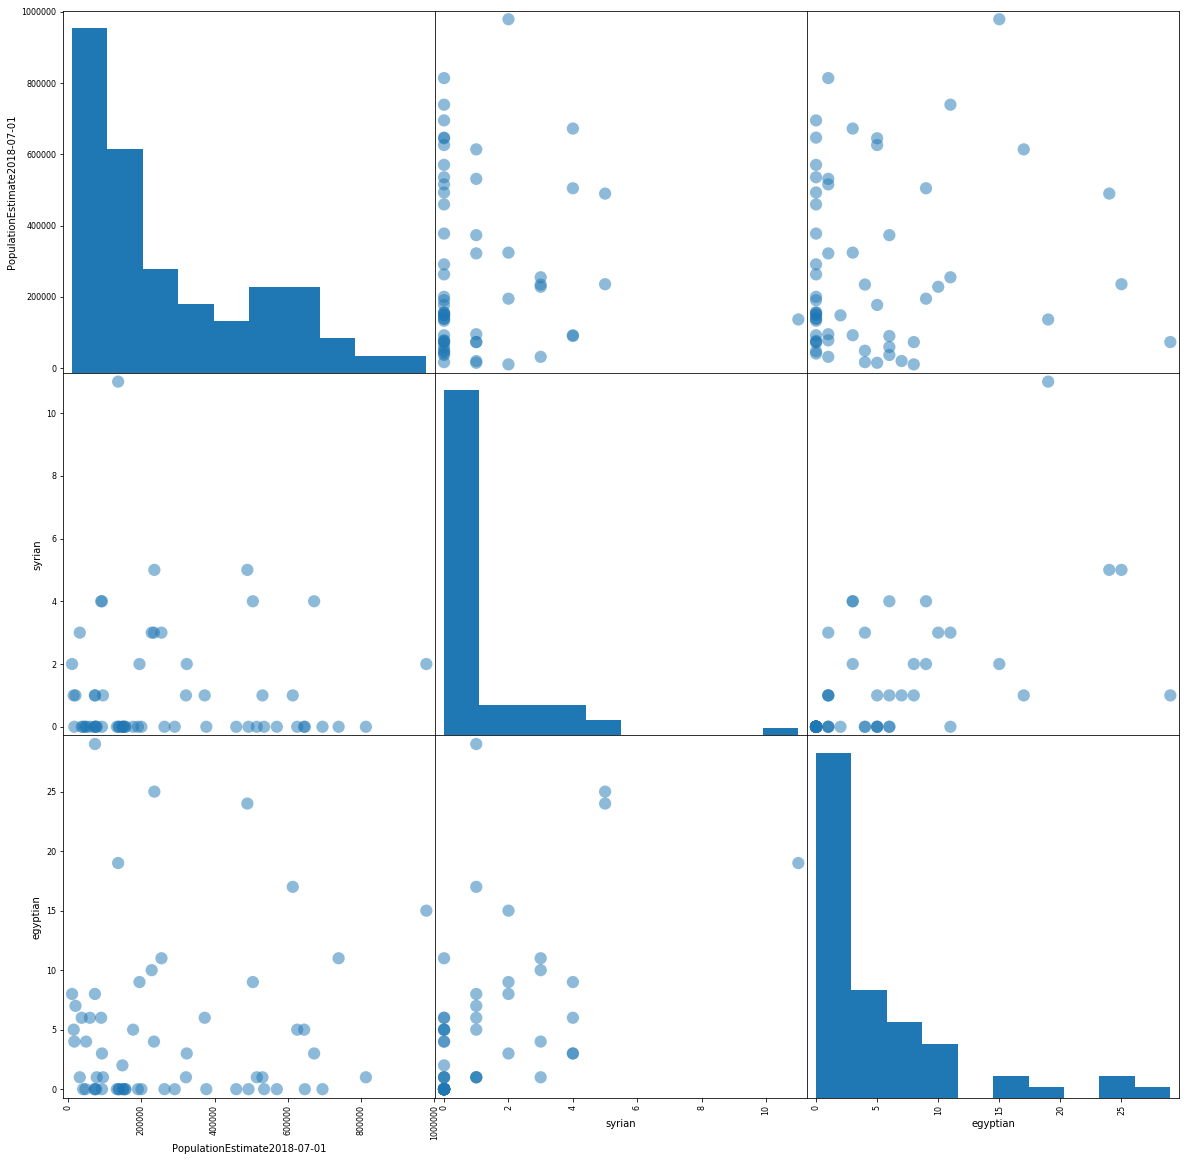

In [131]:


pd.plotting.scatter_matrix(ddd, grid = True, figsize=(20, 20), s= 600)

In [169]:
dd

,index,Latitude,Longitude,Area,PopulationEstimate2018-07-01,search_radius,syrian,egyptian,cluster
0,"15th of May City,Cairo",29.8320418,31.3647679,75.99,95313,4918.167164,1,1,0
1,"Abidin,Cairo",30.50473,31.25247,1.72,41076,739.927702,0,0,0
2,"Ad-Darb al-Ahmar,Cairo",30.043259,31.257908,1.87,59578,771.517652,0,6,Slightly recommended for syrian restaurants
4,"Ain Schams,Cairo",30.128183,31.333451,8.32,625848,1627.371578,0,5,Slightly recommended for syrian restaurants
5,"Al-Ahram,Giza",30.005756,31.2951739,17.96,672064,2390.992588,4,3,Slightly recommended for syrian restaurants
8,"Azbakeya,Cairo",30.0538891,31.2454725,1.33,20132,650.655169,1,7,Slightly recommended for syrian restaurants
10,"Al-Basatin,Cairo",29.9817698,31.2677778,23.43,504659,2730.934022,4,9,Slightly recommended for syrian restaurants
11,"Al-Hawamidiyah,Giza",30.00808,31.21093,17.29,194970,2345.970574,2,9,Slightly recommended for syrian restaurants
12,"Al-Jamaliyah,Cairo",30.051726,31.266429,2.08,37045,813.685789,0,6,Slightly recommended for syrian restaurants
13,"Giza,Giza",30.0170059,31.2134513,12.96,291265,2031.082501,0,0,0
